# INF-0616 - Aula 3: *OvO*/*OvR* estratégias com o SVC

Professora: Esther Colombini -- esther@ic.unicamp.br

Monitores: Alana Santana -- alana.correia@ic.unicamp.br
           Hudson Bruno -- hudson.bruno@ic.unicamp.br


Este *notebook* faz parte da disciplina INF-0616 no curso de extensão MDC.  
Demais artefatos podem ser encontrados no moodle da disciplina: 
[moodle.lab.ic.unicamp.br/456](https://moodle.lab.ic.unicamp.br/moodle/course/view.php?id=456)

Instituto de Computação - Unicamp 2021

In [12]:
from __future__ import print_function

import itertools
import warnings
from time import time

import numpy as np
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

warnings.filterwarnings('ignore')
np.random.seed(42)
sns.set()

## Lendo o dataset

In [13]:
digits = datasets.load_digits()
x, y = digits.data, digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

# de amostras de treino: 898
# de amostras de teste: 899
# de características: 64
# de classes: 10

Algumas amostras de dígitos:


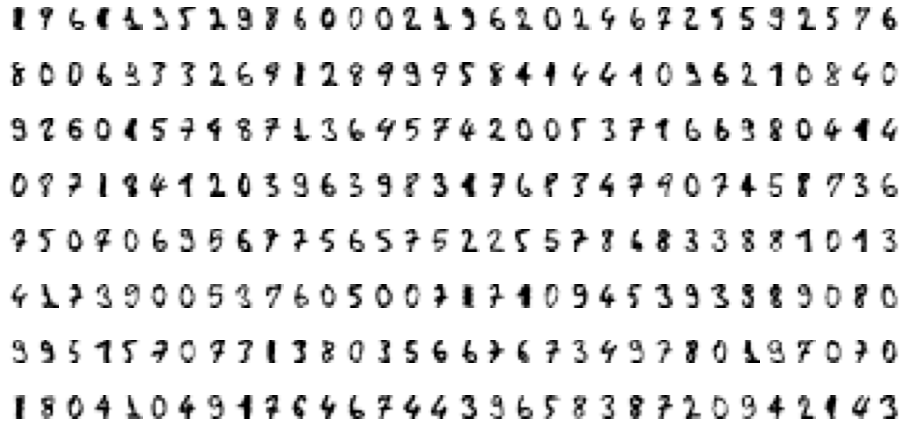

In [11]:
print('# de amostras de treino: %i' % x_train.shape[0],
      '# de amostras de teste: %i' % x_test.shape[0],
      '# de características: %s' % x_train.shape[1],
      '# de classes: %i' % (np.max(y_train) + 1),
      sep='\n', end='\n\n')

print('Algumas amostras de dígitos:')
_ = plt.figure(figsize=(16, 8))
for ix in range(8  * 32):
    plt.subplot(8, 32, ix + 1)
    plt.imshow(x_train[ix].reshape(8, 8), cmap='Greys')
    plt.axis('off')

Normalizamos o conjunto de dados de acordo com sua média e desvio padrão:

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# scaler.fit(x)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

In [15]:
# Abaixo estão algumas funções que podem ser úteis no decorrer dessa atividade:

def train_and_evaluate(tag, model, train, test):
    """Treina um modelo `model` sobre o conjunto `train=(x, y)` e avalia
       os resultados sobre o conjunto `test`.
    """
    (x_train, y_train), (x_test, y_test) = train, test
    p_test = model.fit(x_train, y_train).predict(x_test)

    print('~> Strategy', tag)
    print(metrics.classification_report(y_test, p_test, target_names=digits.target_names.astype(str)))

    # Calculo da matriz de confusão.
    c = metrics.confusion_matrix(test[1], p_test)
    
    # Impressão dos gráficos.
    labels = digits.target_names

    (plt
     .figure(figsize=(6, 6))
     .suptitle('Matriz de confusão sobre Digits/teste c/ a estratégia %s' % tag, fontsize=20))
    sns.heatmap(c,
                cmap="YlGnBu", linewidths=.5, annot=True,
                xticklabels=labels, yticklabels=labels, cbar=False)

### OvO e OvR

**Por padrão, os classificadores do sklearn assumem a estratégia one-vs-one. Utilize a função `train_and_evaluate` acima, passando um SVC linear convencional usando os hiperparametros default (nesse caso C=1), estudado até agora, e observe a pontuação sobre o conjunto de teste.**


~> Strategy original
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        82
           1       0.98      0.98      0.98        89
           2       0.98      1.00      0.99        83
           3       0.98      0.94      0.96        93
           4       0.97      1.00      0.98        93
           5       0.99      0.96      0.97        99
           6       0.99      0.98      0.98        98
           7       0.96      0.99      0.97        87
           8       0.95      0.94      0.95        83
           9       0.98      0.97      0.97        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



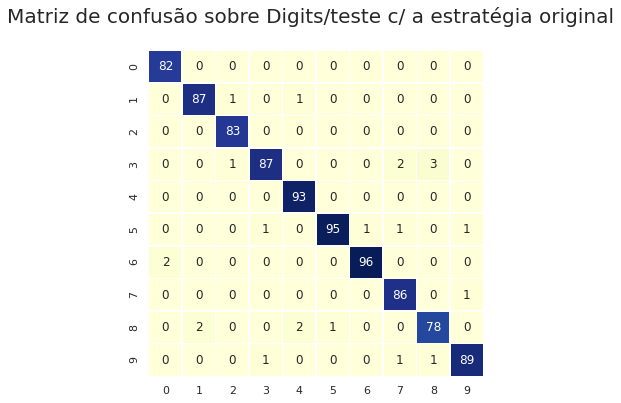

In [16]:
rs = 42
sv = SVC(kernel='linear', random_state=rs)

train_and_evaluate('original', sv,
                   (x_train, y_train),
                   (x_test, y_test))

**Para se adotar uma estratégia diferente, é necessário a utilização de algum dos *wrappers* em `sklearn.multiclass`. Utilize as classes adequadas para corretamente executar as abordagens OvO e OvR. Treine e avalie os resultados sobre *digits*.**

Garanta que ambos os classificadores começem com o mesmo estado aleatório `rs`

In [17]:
rs = 42

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier


ovo_model = OneVsOneClassifier(SVC(kernel='linear', random_state=rs))
ovr_model = OneVsRestClassifier(SVC(kernel='linear', random_state=rs))

~> Strategy OvO
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        82
           1       0.99      0.94      0.97        89
           2       0.98      1.00      0.99        83
           3       0.99      0.91      0.95        93
           4       0.99      1.00      0.99        93
           5       0.99      0.96      0.97        99
           6       0.99      0.98      0.98        98
           7       0.96      0.99      0.97        87
           8       0.90      0.98      0.94        83
           9       0.97      0.97      0.97        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



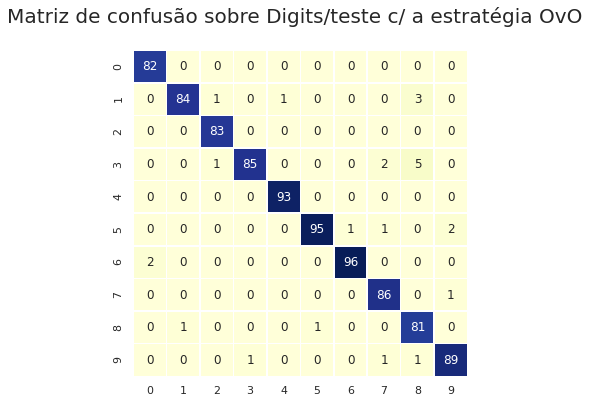

In [18]:
train_and_evaluate('OvO', ovo_model,
                   (x_train, y_train),
                   (x_test, y_test))

~> Strategy OvR
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        82
           1       0.94      0.96      0.95        89
           2       0.92      0.99      0.95        83
           3       0.96      0.86      0.91        93
           4       0.98      0.96      0.97        93
           5       0.93      0.94      0.93        99
           6       0.99      0.98      0.98        98
           7       0.90      0.99      0.94        87
           8       0.88      0.89      0.89        83
           9       0.95      0.88      0.92        92

    accuracy                           0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.94      0.94      0.94       899



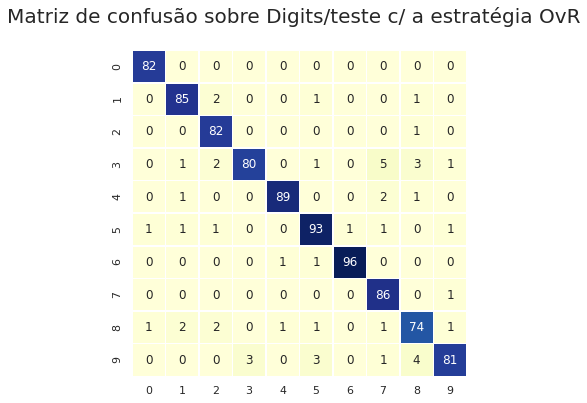

In [19]:
train_and_evaluate('OvR', ovr_model,
                   (x_train, y_train),
                   (x_test, y_test))